# Multiple Linear Regression With Python

The data set contains information about money spent on advertisement and their generated sales. Money was spent on 
TV, radio and newspaper ads.

## Problem

**How advertisement spending impacts to sales ?**

_**Dependent variable:**_ sales

_**Independent variables:**_ TV, radio and newspaper

In [1]:
# Importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading data
The ```Advertising.csv``` is located under ```dataset``` directory 

In [2]:
# Reads the dataset using panda and create a dataframe object
data = pd.read_csv("dataset/Advertising.csv")

# Check how the data looks like
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
# Since the column "Unnamed: 0" is redundant, remove the colum from dataframe 
data = data.drop(['Unnamed: 0'], axis='columns')

# Check the updated dataset
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Modelling

#### We will consider effect of TV, radio and newspaper ads on sales.
#### Let's visualize the dataset on scatter plot.

Independent Features:  ['TV', 'radio', 'newspaper']
Dependent Features:  sales


/Users/nadisha/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


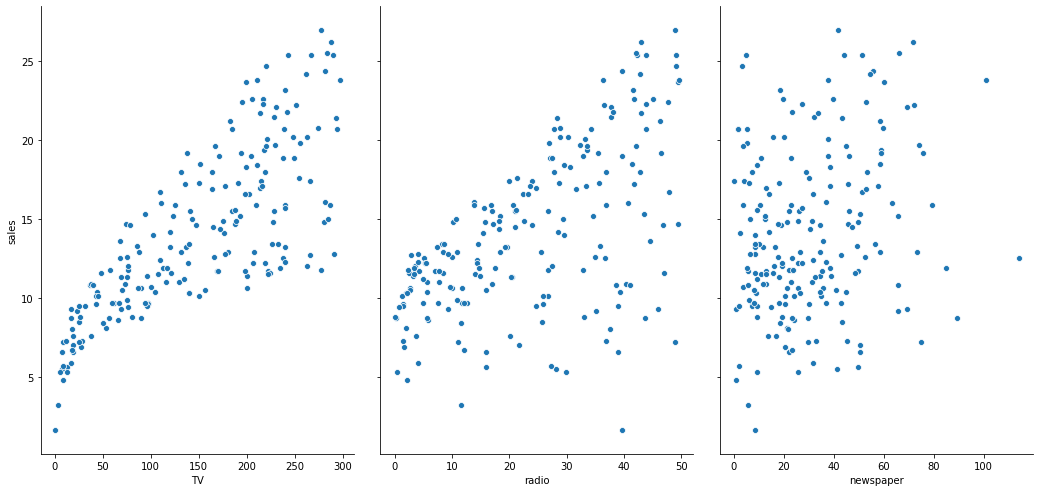

In [5]:
# Remove "sales" column and get other columns
independent_vars = data.drop(['sales'], axis = 'columns')
dependent_var = data['sales'].values.reshape(-1,1)

independent_var_names = ['TV', 'radio', 'newspaper']
dependent_var_name = 'sales'

print("Independent Features: ", independent_var_names)
print("Dependent Features: ", dependent_var_name)

# visualize the relationship between the independent variables and the dependent variable using scatterplots
sns.pairplot(data, x_vars = independent_var_names, y_vars = dependent_var_name, size=7, aspect=0.7)

* **TV - Sales** has a moderate positive relationship 
* **Radio - Sales** has a weak positive relationship
* **Newspaper - Sales** has no linear relationship

#### However, let’s see how we can generate a linear approximation for this

In [10]:
# Using SCIKIT-LEARN
reg = LinearRegression()
reg.fit(independent_vars, dependent_var)

print("The intercepter is: ", reg.intercept_[0])
print("The coefficent of TV ads is: ", reg.coef_[0][0])
print("The coefficent of Radio ads is: ", reg.coef_[0][1])
print("The coefficent of Newspaper ads is: ", reg.coef_[0][2])
print()
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The intercepter is:  2.9388893694594067
The coefficent of TV ads is:  0.04576464545539761
The coefficent of Radio ads is:  0.18853001691820462
The coefficent of Newspaper ads is:  -0.0010374930424762972

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


## Interpreting Model Coefficients
* **TV coefficent**

An additional one dollar (1 USD) spent on TV ads is associated with and increase in sales of 0.04576 USD. In other words, if you spend 1000 USD on TV ads, your sales will increased by 45.76 USD.

* **Radio coefficent**

An additional one dollar (1 USD) spent on Radio ads is associated with and increase in sales of 0.18853 USD. In other words, if you spend 1000 USD on Radio ads, your sales will increased by 188.53 USD.

* **Newspaper coefficent**

An additional one dollar (1 USD) spent on Newspaper ads is associated with and decrease in sales of 0.00103 USD. In other words, if you spend 1000 USD on Newspaper ads, your sales will decrease by 1.03 USD.

* **Interceptor**

Even if you haven't spent on advertisements, the sales would be 2.93 USD


#### Let’s visualize how the line fits the data.

/Users/nadisha/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


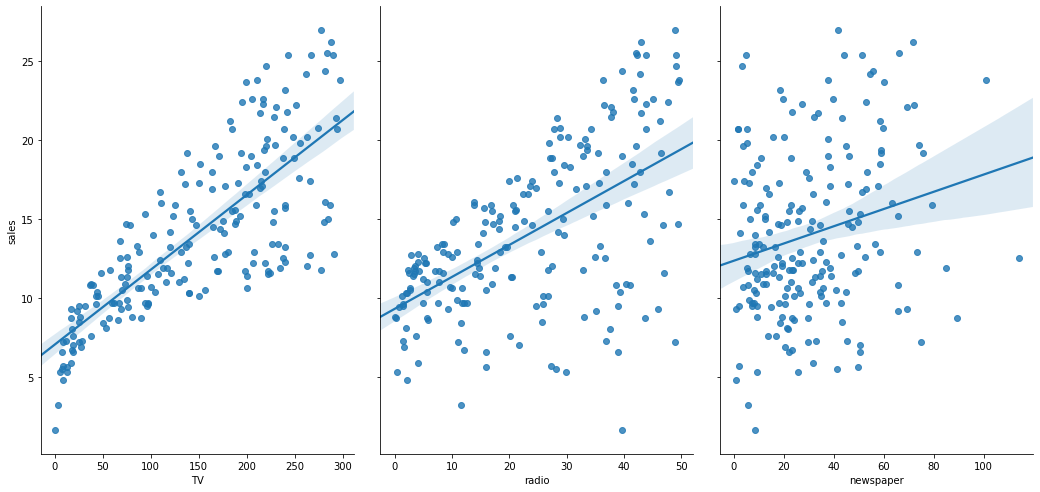

In [7]:
independent_var_names = ['TV', 'radio', 'newspaper']
dependent_var_name = 'sales'

sns.pairplot(data, x_vars = independent_var_names, y_vars = dependent_var_name, size=7, aspect=0.7, kind='reg')

## Assessing the relevancy of the model

In [8]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

# Adds a column of ones to an array (X)
X2 = sm.add_constant(X)

# A simple ordinary least squares model.
est = sm.OLS(y, X2)

# Full fit of the model.
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        14:43:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

As you can see, the R² is much higher with a value of 0.897

F-statistic is 570.3. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.

If you notice that the third coefficient (the one for newspaper) has a large p-value (greather than 0.05). Therefore, ad spending on newspaper is not **statistically significant**. 

It is less likely to impact on the salaes if you sepend on newspaper advertisements. Therefore, you could remove the newpaper predictor to increase the prediction power of the model

In [9]:
X = np.column_stack((data['TV'], data['radio']))
y = data['sales']

# Adds a column of ones to an array (X)
X2 = sm.add_constant(X)

# A simple ordinary least squares model.
est = sm.OLS(y, X2)

# Full fit of the model.
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        14:43:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

As you can see, the R² value has not changes (0.897).

F-statistic has increased from 570.3 to 859.6.

The p-value of both TV and radio, is less than 0.05. Therefore, ad spending on TV and radio is **statistically significant**.

Looking at both coefficients, we have a **p-value** that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).

Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability of sales is explained by the amount spent on TV ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.